In [14]:
import yfinance as yf
import pandas as pd
import datetime

# List of stock market ticker symbols and their Yahoo Finance codes
stock_indices = {
    'BSE': '^BSESN',      # BSE Sensex
    'FTSE': '^KLSE',      # Bursa Malaysia Index
    'Hangseng': '^HSI',   # Hang Seng Index
    'JKSE': '^JKSE',      # Jakarta Composite Index
    'NIKKEI': '^N225',    # Nikkei 225
    'CSE': '^CSE',        # Colombo Stock Exchange
    'SMI': '^SSMI',       # Swiss Market Index
    'SSE': '000001.SS',   # SSE Composite Index
    'TSEC': '^TWII'       # Taiwan Weighted Index
}

# Set the start and end dates
start_date = datetime.datetime(2001, 1, 4)
end_date = datetime.datetime(2011, 12, 30)

# Download data for each index and store it in a dictionary
data = {}

for name, ticker in stock_indices.items():
    print(f"Downloading data for {name}...")
    try:
        data[name] = yf.download(ticker, start=start_date, end=end_date)
    except Exception as e:
        print(f"Could not download data for {name}: {e}")

# Save the data to CSV files
for name, df in data.items():
    if not df.empty:
        df.to_csv(f"{name}_stock_data.csv")
        print(f"Data for {name} saved to {name}_stock_data.csv")
    else:
        print(f"No data available for {name}")

print("Data download complete.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for BSE saved to BSE_stock_data.csv
Data for FTSE saved to FTSE_stock_data.csv
Data for Hangseng saved to Hangseng_stock_data.csv
Data for JKSE saved to JKSE_stock_data.csv
Data for NIKKEI saved to NIKKEI_stock_data.csv
Data for CSE saved to CSE_stock_data.csv
Data for SMI saved to SMI_stock_data.csv
Data for SSE saved to SSE_stock_data.csv
Data for TSEC saved to TSEC_stock_data.csv
Data download complete.


In [15]:
import pandas as pd
from scipy import stats

# Function to calculate descriptive statistics for 'Close' prices
def descriptive_statistics(df):
    return {
        'Mean': df['Close'].mean(),
        'Median': df['Close'].median(),
        'Mode': df['Close'].mode().iloc[0] if not df['Close'].mode().empty else None,
        'Standard Deviation': df['Close'].std(),
        'Kurtosis': df['Close'].kurtosis(),
        'Skewness': df['Close'].skew()
    }

# Load the CSV files and create a descriptive analysis table
results = {}

for name in stock_indices.keys():
    try:
        # Load the data from CSV
        df = pd.read_csv(f"{name}_stock_data.csv", parse_dates=['Date'], index_col='Date')
        
        # Filter out rows without 'Close' prices (if any)
        df = df[df['Close'].notnull()]
        
        # Add statistics to results dictionary
        results[name] = descriptive_statistics(df)
    except FileNotFoundError:
        print(f"Data file for {name} not found. Skipping.")
    except Exception as e:
        print(f"Error processing {name}: {e}")

# Create a DataFrame from the results
descriptive_df = pd.DataFrame(results).T

# Print the descriptive analysis table
descriptive_df

,Mean,Median,Mode,Standard Deviation,Kurtosis,Skewness
BSE,10405.214631,9849.030273,3024.350098,5851.065755,-1.499198,0.146804
FTSE,1017.248283,923.570007,919.070007,292.028710,-1.166981,0.346482
Hangseng,16591.022183,15497.809570,20435.240234,5046.649050,-0.885270,0.345989
JKSE,1610.384033,1310.262939,398.054993,1092.120785,-0.771073,0.639344
NIKKEI,11751.677950,10965.049805,9653.919922,2769.776278,-0.515191,0.746174
CSE,2457.461917,2142.459961,416.760010,1890.586595,0.952737,1.347954
SMI,6518.181564,6366.000000,6210.299805,1241.304354,-0.380302,0.515879
SSE,2257.483634,1955.099976,1404.008057,1010.047207,1.660114,1.318104
TSEC,6579.031629,6428.029785,3774.620117,1420.696641,-0.889681,0.110220


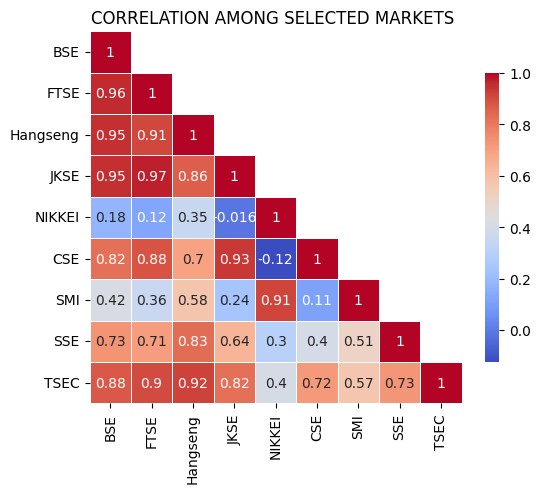

In [16]:
# %% Correlation Matrix Visualization (Upper Triangle with Desired Order)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# List of CSV files that contain the stock data
csv_files = glob.glob("*.csv")

# Dictionary to store 'Close' prices for each index
close_prices = {}

for file in csv_files:
    # Extract the stock index name from the file name
    stock_name = file.split('_')[0]
    
    # Read the CSV file
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    
    # Add 'Close' prices to the dictionary if available
    if 'Close' in df.columns:
        close_prices[stock_name] = df['Close']

# Combine the 'Close' prices into a single DataFrame
close_prices_df = pd.DataFrame(close_prices)

# Drop rows with NaN values to ensure correlation is accurate
close_prices_df = close_prices_df.dropna()

# Calculate the correlation matrix
correlation_matrix = close_prices_df.corr()

# Reorder the correlation matrix to match the desired order
desired_order = ['BSE', 'FTSE', 'Hangseng', 'JKSE', 'NIKKEI', 'CSE', 'SMI', 'SSE', 'TSEC']
correlation_matrix = correlation_matrix[desired_order].loc[desired_order]

# Create a mask to display only the upper triangle of the matrix (excluding the diagonal)
mask = np.triu(np.ones(correlation_matrix.shape), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(6, 5))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Title and display
plt.title("CORRELATION AMONG SELECTED MARKETS ")
plt.show()


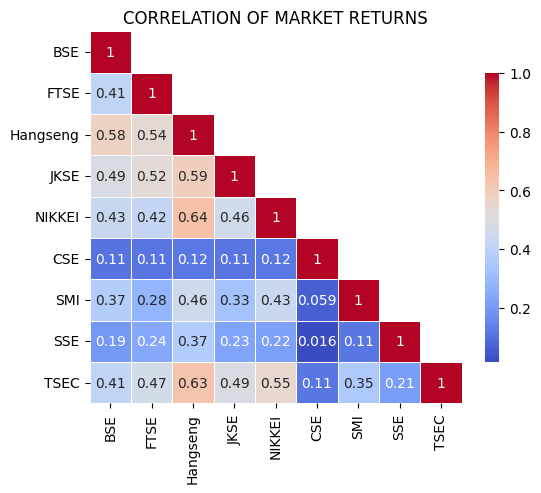

In [17]:
# %% Correlation Matrix Visualization (Upper Triangle with Desired Order)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# List of CSV files that contain the stock data
csv_files = glob.glob("*.csv")

# Dictionary to store 'Close' prices for each index
close_prices = {}

for file in csv_files:
    # Extract the stock index name from the file name
    stock_name = file.split('_')[0]
    
    # Read the CSV file
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    
    # Add 'Close' prices to the dictionary if available
    if 'Close' in df.columns:
        close_prices[stock_name] = df['Close']

# Combine the 'Close' prices into a single DataFrame
close_prices_df = pd.DataFrame(close_prices)

# Drop rows with NaN values to ensure accurate return calculations
close_prices_df = close_prices_df.dropna()

# Calculate daily returns as the percentage change in 'Close' prices
returns_df = close_prices_df.pct_change().dropna()

# Calculate the correlation matrix of the returns
correlation_matrix = returns_df.corr()

# Reorder the correlation matrix to match the desired order
desired_order = ['BSE', 'FTSE', 'Hangseng', 'JKSE', 'NIKKEI', 'CSE', 'SMI', 'SSE', 'TSEC']
correlation_matrix = correlation_matrix[desired_order].loc[desired_order]

# Create a mask to display only the upper triangle of the matrix (excluding the diagonal)
mask = np.triu(np.ones(correlation_matrix.shape), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(6, 5))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Title and display
plt.title("CORRELATION OF MARKET RETURNS")
plt.show()


In [8]:
# Unit Root Test (ADF Test) for Each Stock Index at Level and First Difference
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import glob

# List of CSV files that contain the stock data
csv_files = glob.glob("*.csv")

# Dictionary to store ADF test results for each index
adf_results = {}

for file in csv_files:
    # Extract the stock index name from the file name
    stock_name = file.split('_')[0]
    
    # Read the CSV file
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    
    # Perform ADF test on the 'Close' prices at Level (Intercept)
    if 'Close' in df.columns:
        series = df['Close'].dropna()
        
        # Level (Intercept)
        adf_level = adfuller(series, regression='c')  # 'c' for constant (intercept only)
        
        # First Difference (With Trend & Intercept)
        adf_first_diff = adfuller(series.diff().dropna(), regression='ct')  # 'ct' for trend and intercept
        
        # Store results for both tests
        adf_results[stock_name] = {
            'Level (Intercept) Test Statistic': round(adf_level[0], 3),
            'First Diff (Trend & Intercept) Test Statistic': round(adf_first_diff[0], 3),
        }

# Convert results to a DataFrame
adf_results_df = pd.DataFrame(adf_results).T

# Print the ADF test results
print("ADF Test Results for Each Stock Index:")
adf_results_df

ADF Test Results for Each Stock Index:


,Level (Intercept) Test Statistic,First Diff (Trend & Intercept) Test Statistic
BSE,-1.099,-11.054
CSE,-0.153,-7.397
FTSE,-0.688,-8.529
Hangseng,-1.440,-53.603
JKSE,0.020,-8.731
NIKKEI,-1.489,-53.460
SMI,-1.624,-23.917
SSE,-1.553,-9.248
TSEC,-1.941,-12.613


In [9]:
# check ADF test after differencing
for stock in close_prices_df.columns:
    result = adfuller(close_prices_df[stock].dropna())
    print(f"{stock} - ADF Statistic: {result[0]}, p-value: {result[1]}")


BSE - ADF Statistic: -1.0450573902700075, p-value: 0.7364781582051175
CSE - ADF Statistic: 0.020513642310983047, p-value: 0.9601960270962913
FTSE - ADF Statistic: -0.5621670320498137, p-value: 0.8793036500652593
Hangseng - ADF Statistic: -1.5271978778706792, p-value: 0.5200166155120274
JKSE - ADF Statistic: 0.31283363414524024, p-value: 0.9779256846534738
NIKKEI - ADF Statistic: -1.5164715345416335, p-value: 0.5253479417386688
SMI - ADF Statistic: -1.74967583083655, p-value: 0.40571664155416687
SSE - ADF Statistic: -1.582657153156016, p-value: 0.4922992764583009
TSEC - ADF Statistic: -1.8037404099307115, p-value: 0.3786062715484971


In [10]:
# Differencing the data if the ADF test indicates non-stationarity (p-value > 0.05)
for stock in close_prices_df.columns:
    result = adfuller(close_prices_df[stock])
    if result[1] > 0.05:  # If non-stationary
        close_prices_df[stock] = close_prices_df[stock].diff().dropna()  # First difference

In [11]:
# Recheck ADF test after differencing
for stock in close_prices_df.columns:
    result = adfuller(close_prices_df[stock].dropna())
    print(f"{stock} - ADF Statistic: {result[0]}, p-value: {result[1]}")

BSE - ADF Statistic: -17.319585013900113, p-value: 5.491811492391586e-30
CSE - ADF Statistic: -7.38732519428263, p-value: 8.171767337084838e-11
FTSE - ADF Statistic: -15.988832199256334, p-value: 6.706667487140905e-29
Hangseng - ADF Statistic: -12.719968386934971, p-value: 9.875821392829105e-24
JKSE - ADF Statistic: -13.333532211956607, p-value: 6.115949376378481e-25
NIKKEI - ADF Statistic: -21.59551072221004, p-value: 0.0
SMI - ADF Statistic: -15.42886036454772, p-value: 2.9668153355627407e-28
SSE - ADF Statistic: -6.970089266460214, p-value: 8.709946369945962e-10
TSEC - ADF Statistic: -23.83470597987943, p-value: 0.0


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import itertools
import warnings
import logging

# Suppress all warnings
warnings.filterwarnings('ignore')
logging.getLogger('statsmodels').setLevel(logging.ERROR)

def perform_bse_granger_causality_analysis(data_files, lag=1):
    """
    Perform Granger causality tests focusing on BSE relationships with other indices.
    """
    close_prices = {}
    
    # Read data from CSV files
    for file in data_files:
        try:
            stock_name = file.split('_')[0]
            df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
            if 'Close' in df.columns:
                close_prices[stock_name] = df['Close']
        except Exception as e:
            print(f"Error reading {file}: {str(e)}")
            continue
    
    close_prices_df = pd.DataFrame(close_prices)
    close_prices_df = close_prices_df.dropna()
    returns_df = np.log(close_prices_df).diff().dropna()
    
    results = []
    # Only test pairs that include BSE
    other_markets = [col for col in returns_df.columns if col != 'BSE']
    
    for other_market in other_markets:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                
                # Test BSE -> other market
                test1 = grangercausalitytests(
                    returns_df[[other_market, 'BSE']], 
                    maxlag=lag, 
                    verbose=False
                )
                
                f_stat1 = test1[lag][0]['ssr_ftest'][0]
                p_val1 = test1[lag][0]['ssr_ftest'][1]
                
                # Test other market -> BSE
                test2 = grangercausalitytests(
                    returns_df[['BSE', other_market]], 
                    maxlag=lag, 
                    verbose=False
                )
                
                f_stat2 = test2[lag][0]['ssr_ftest'][0]
                p_val2 = test2[lag][0]['ssr_ftest'][1]
                
                direction1 = "Rejected" if p_val1 < 0.05 else "Accepted"
                direction2 = "Rejected" if p_val2 < 0.05 else "Accepted"
                
                if direction1 == "Rejected" and direction2 == "Rejected":
                    causality = "Bidirectional"
                elif direction1 == "Rejected":
                    causality = f"Unidirectional (BSE → {other_market})"
                elif direction2 == "Rejected":
                    causality = f"Unidirectional ({other_market} → BSE)"
                else:
                    causality = "No causality"
                
                results.extend([
                    {
                        'Null Hypothesis': f"BSE does not Granger cause {other_market}",
                        'F Value': round(f_stat1, 4),
                        'P-Value': round(p_val1, 4),
                        'Remarks': direction1,
                        'Causality Direction': causality
                    },
                    {
                        'Null Hypothesis': f"{other_market} does not Granger cause BSE",
                        'F Value': round(f_stat2, 4),
                        'P-Value': round(p_val2, 4),
                        'Remarks': direction2,
                        'Causality Direction': causality
                    }
                ])
                
        except Exception as e:
            print(f"Error testing causality between BSE and {other_market}: {str(e)}")
            continue
    
    return pd.DataFrame(results)

# Example usage
if __name__ == "__main__":
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    csv_files = [
        "BSE_stock_data.csv",
        "FTSE_stock_data.csv",
        "Hangseng_stock_data.csv",
        "JKSE_stock_data.csv",
        "NIKKEI_stock_data.csv",
        "CSE_stock_data.csv",
        "SMI_stock_data.csv",
        "SSE_stock_data.csv",
        "TSEC_stock_data.csv"
    ]
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        results = perform_bse_granger_causality_analysis(csv_files, lag=1)
        
results[['Null Hypothesis', 'F Value', 'P-Value', 'Remarks', 'Causality Direction']]

,Null Hypothesis,F Value,P-Value,Remarks,Causality Direction
0,BSE does not Granger cause FTSE,11.0803,0.0009,Rejected,Unidirectional (BSE → FTSE)
1,FTSE does not Granger cause BSE,0.0709,0.7900,Accepted,Unidirectional (BSE → FTSE)
2,BSE does not Granger cause Hangseng,20.3731,0.0000,Rejected,Unidirectional (BSE → Hangseng)
3,Hangseng does not Granger cause BSE,1.2197,0.2696,Accepted,Unidirectional (BSE → Hangseng)
4,BSE does not Granger cause JKSE,22.5438,0.0000,Rejected,Unidirectional (BSE → JKSE)
5,JKSE does not Granger cause BSE,2.7614,0.0967,Accepted,Unidirectional (BSE → JKSE)
6,BSE does not Granger cause NIKKEI,38.2277,0.0000,Rejected,Unidirectional (BSE → NIKKEI)
7,NIKKEI does not Granger cause BSE,1.4009,0.2367,Accepted,Unidirectional (BSE → NIKKEI)
8,BSE does not Granger cause CSE,5.2988,0.0214,Rejected,Unidirectional (BSE → CSE)
9,CSE does not Granger cause BSE,0.4936,0.4824,Accepted,Unidirectional (BSE → CSE)


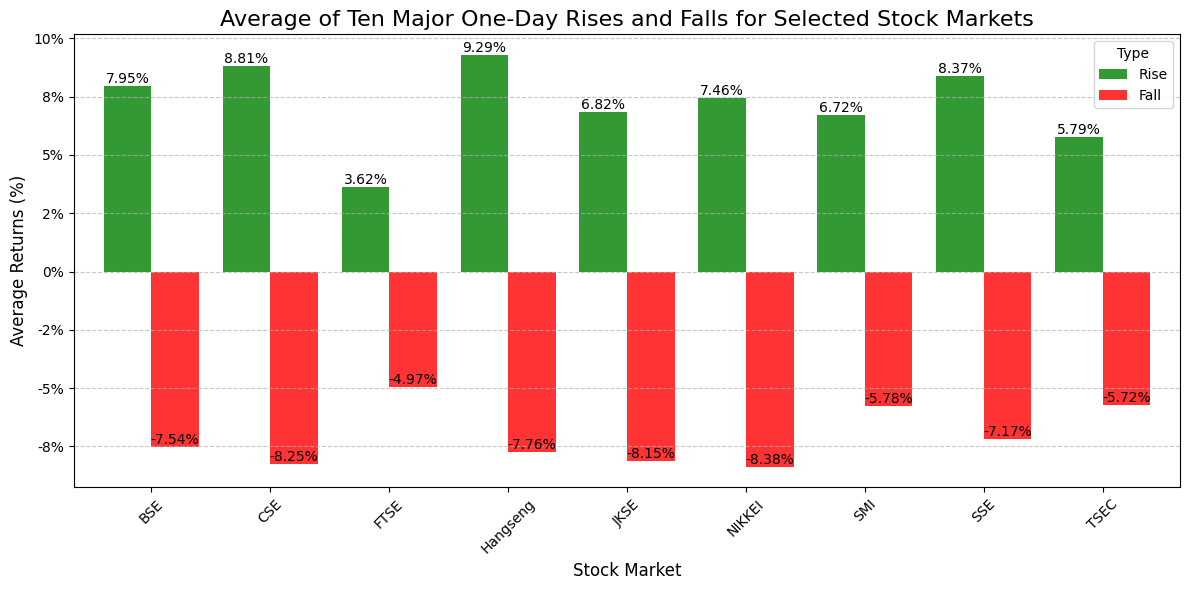

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# List of CSV files containing stock market data
csv_files = glob.glob("*.csv")

# Dictionary to store average major rises and falls
average_rises_falls = {}

for file in csv_files:
    # Extract stock market name from the file name
    stock_name = file.split('_')[0]
    
    # Load the CSV data
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date') 
    
    # Calculate daily percentage changes
    if 'Close' in df.columns:
        daily_returns = df['Close'].pct_change().dropna()
        
        # Find the ten largest rises and ten largest falls
        top_10_rises = daily_returns.nlargest(10).mean() * 100  # Convert to percentage
        top_10_falls = daily_returns.nsmallest(10).mean() * 100  # Convert to percentage
        
        # Store the results
        average_rises_falls[stock_name] = {'Rise': top_10_rises, 'Fall': top_10_falls}

# Convert the results to a DataFrame for easier plotting
average_rises_falls_df = pd.DataFrame(average_rises_falls).T  # Transpose for proper format

# Plot the average rises and falls
plt.figure(figsize=(12, 6))

# Bar plot for rises and falls
ax = average_rises_falls_df.plot(kind='bar', ax=plt.gca(), color=['green', 'red'], alpha=0.8, width=0.8)

# Add labels and title
plt.title('Average of Ten Major One-Day Rises and Falls for Selected Stock Markets', fontsize=16)
plt.xlabel('Stock Market', fontsize=12)
plt.ylabel('Average Returns (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type', fontsize=10)

# Annotate each bar with its percentage value
for p in ax.patches:
    # Get the height of the bar
    value = p.get_height()
    # Annotate the value above the bar
    ax.annotate(f'{value:.2f}%', 
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=10, color='black')

# Adjust the y-axis to display percentages properly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

# Show grid and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

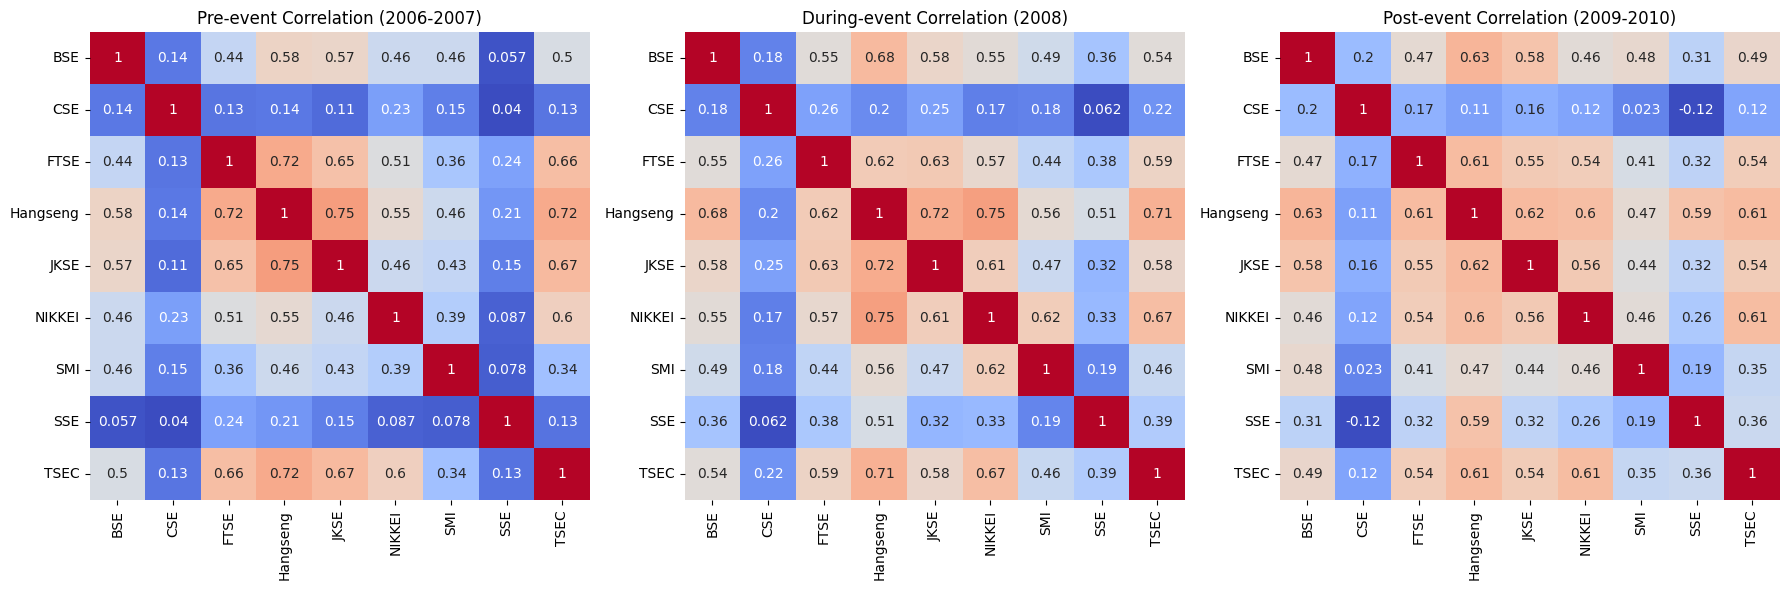

In [ ]:
# Define event periods
pre_event = close_prices_df.loc['2006-01-01':'2007-09-30']
during_event = close_prices_df.loc['2007-10-01':'2009-06-30']
post_event = close_prices_df.loc['2009-07-01':'2010-12-31']

# Calculate correlation matrices
pre_corr = pre_event.corr()
during_corr = during_event.corr()
post_corr = post_event.corr()

# Visualize heatmaps side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(pre_corr, ax=axes[0], annot=True, cmap='coolwarm', cbar=False)
axes[0].set_title('Pre-event Correlation (2006-2007)')

sns.heatmap(during_corr, ax=axes[1], annot=True, cmap='coolwarm', cbar=False)
axes[1].set_title('During-event Correlation (2008)')

sns.heatmap(post_corr, ax=axes[2], annot=True, cmap='coolwarm', cbar=False)
axes[2].set_title('Post-event Correlation (2009-2010)')

plt.tight_layout()
plt.show()

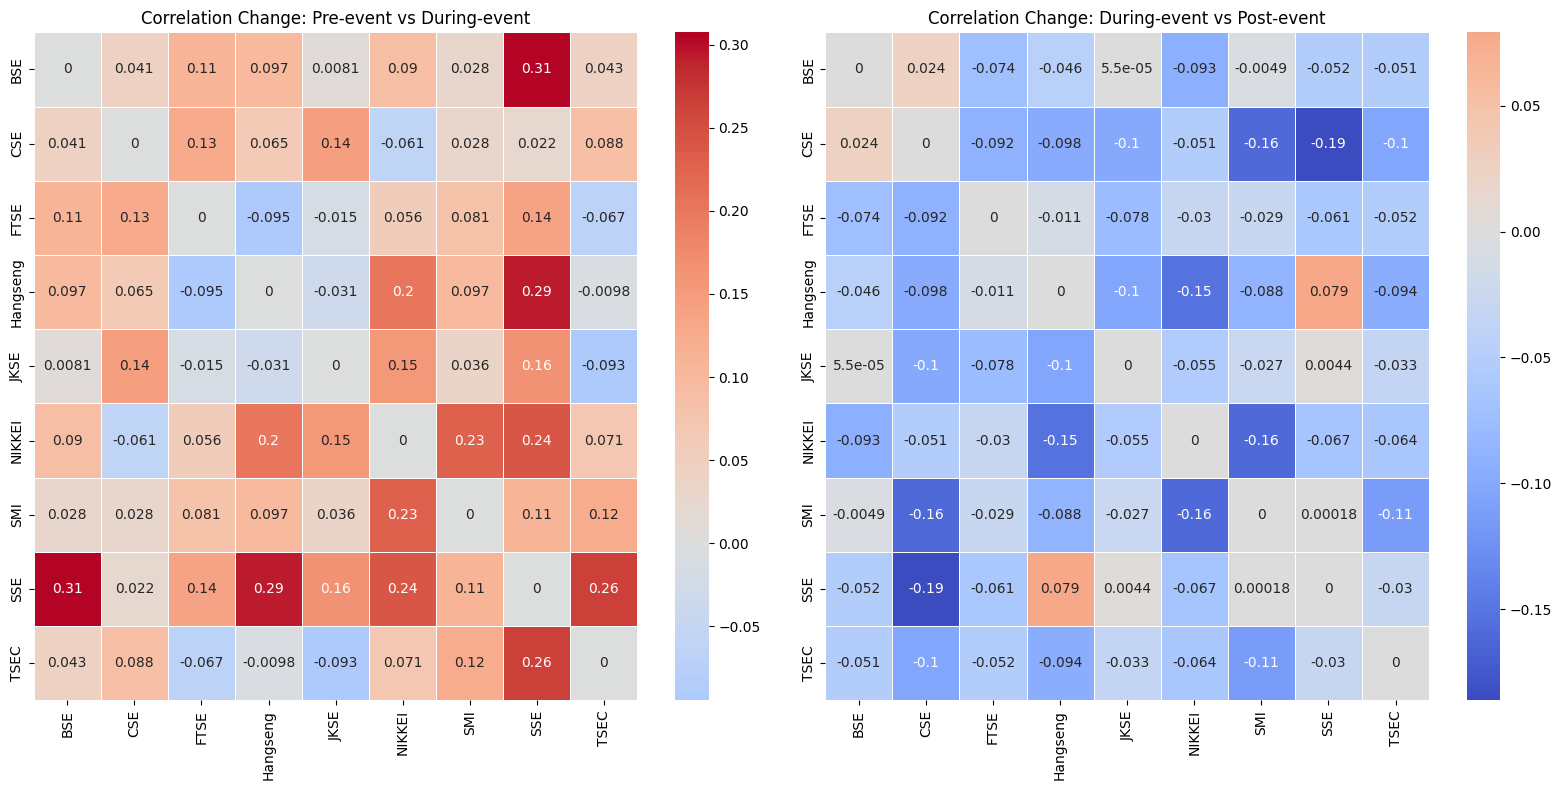

In [11]:
# Calculate differences
pre_during_diff = during_corr - pre_corr
during_post_diff = post_corr - during_corr

# Visualize differences with heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(pre_during_diff, annot=True, cmap='coolwarm', ax=axes[0], center=0, linewidths=0.5)
axes[0].set_title("Correlation Change: Pre-event vs During-event")

sns.heatmap(during_post_diff, annot=True, cmap='coolwarm', ax=axes[1], center=0, linewidths=0.5)
axes[1].set_title("Correlation Change: During-event vs Post-event")

plt.tight_layout()
plt.show()

In [19]:
# Flatten the matrices for significant changes only
pre_during_changes = pre_during_diff.stack().reset_index()
pre_during_changes.columns = ['Market 1', 'Market 2', 'Correlation Change']
pre_during_changes = pre_during_changes[pre_during_changes['Market 1'] != pre_during_changes['Market 2']]

during_post_changes = during_post_diff.stack().reset_index()
during_post_changes.columns = ['Market 1', 'Market 2', 'Correlation Change']
during_post_changes = during_post_changes[during_post_changes['Market 1'] != during_post_changes['Market 2']]

# Calculate absolute changes for sorting
pre_during_changes['Abs Change'] = pre_during_changes['Correlation Change'].abs()
during_post_changes['Abs Change'] = during_post_changes['Correlation Change'].abs()

# Sort by the magnitude of changes
top_pre_during = pre_during_changes.nlargest(12, 'Abs Change')
top_during_post = during_post_changes.nlargest(12, 'Abs Change')

# Add a column for combined market pairs
top_pre_during['Market Pair'] = top_pre_during['Market 1'] + " - " + top_pre_during['Market 2']
top_during_post['Market Pair'] = top_during_post['Market 1'] + " - " + top_during_post['Market 2']

# Summary tables for top changes
print("Top Correlation Changes: Pre-event vs During-event")
top_pre_during[['Market Pair', 'Correlation Change']]

Top Correlation Changes: Pre-event vs During-event


,Market Pair,Correlation Change
7,BSE - SSE,0.307563
63,SSE - BSE,0.307563
34,Hangseng - SSE,0.294538
66,SSE - Hangseng,0.294538
71,SSE - TSEC,0.264131
79,TSEC - SSE,0.264131
52,NIKKEI - SSE,0.241557
68,SSE - NIKKEI,0.241557
51,NIKKEI - SMI,0.228811
59,SMI - NIKKEI,0.228811


In [20]:
print("\nTop Correlation Changes: During-event vs Post-event")
top_during_post[['Market Pair', 'Correlation Change']]


Top Correlation Changes: During-event vs Post-event


,Market Pair,Correlation Change
16,CSE - SSE,-0.186284
64,SSE - CSE,-0.186284
51,NIKKEI - SMI,-0.161002
59,SMI - NIKKEI,-0.161002
15,CSE - SMI,-0.159465
55,SMI - CSE,-0.159465
32,Hangseng - NIKKEI,-0.152931
48,NIKKEI - Hangseng,-0.152931
62,SMI - TSEC,-0.113898
78,TSEC - SMI,-0.113898


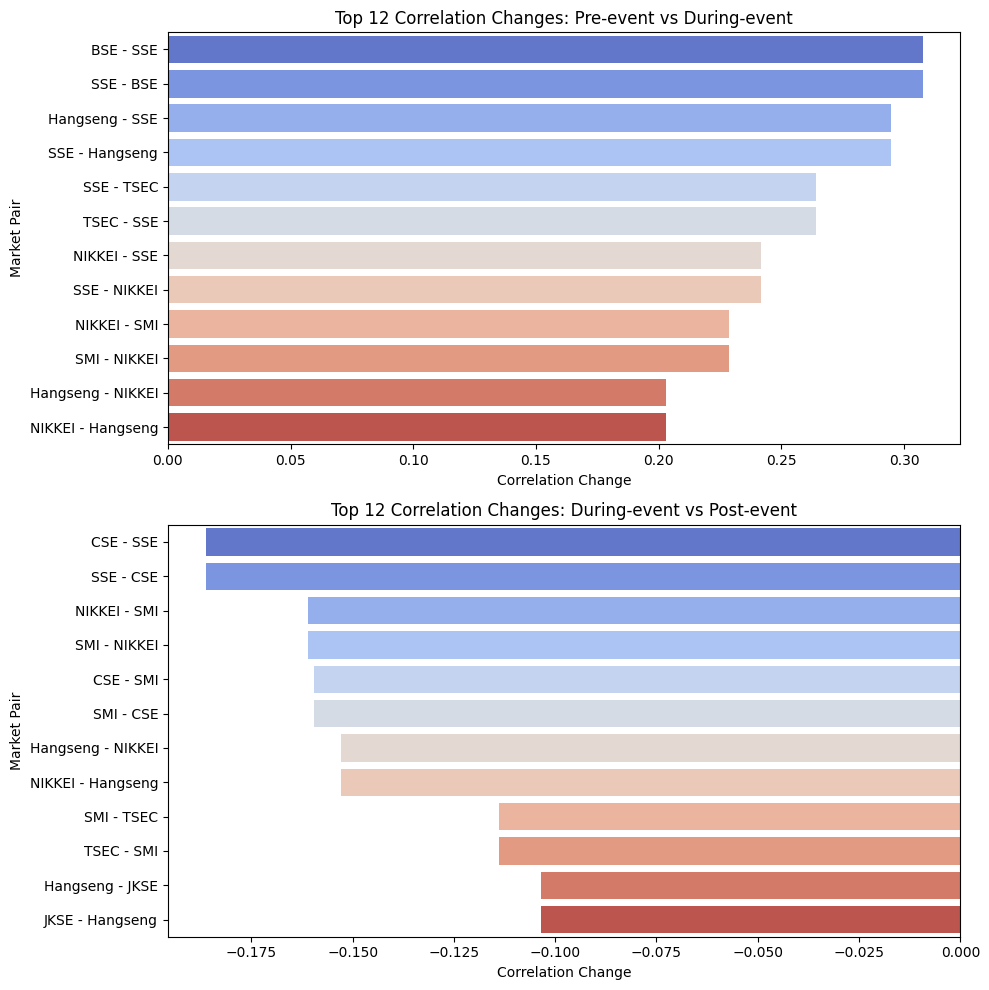

In [18]:
# Plot significant changes concisely
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Pre-event vs During-event
sns.barplot(
    data=top_pre_during, 
    x='Correlation Change', 
    y='Market Pair', 
    palette='coolwarm',
    ax=axs[0]
)
axs[0].set_title("Top 12 Correlation Changes: Pre-event vs During-event")
axs[0].set_xlabel("Correlation Change")
axs[0].set_ylabel("Market Pair")

# During-event vs Post-event
sns.barplot(
    data=top_during_post, 
    x='Correlation Change', 
    y='Market Pair', 
    palette='coolwarm',
    ax=axs[1]
)
axs[1].set_title("Top 12 Correlation Changes: During-event vs Post-event")
axs[1].set_xlabel("Correlation Change")
axs[1].set_ylabel("Market Pair")

plt.tight_layout()
plt.show()

In [13]:
# Calculate daily returns for each market
daily_returns = close_prices_df.pct_change()

# Split the daily returns into Pre-event, During-event, and Post-event periods
pre_event_returns = daily_returns[(daily_returns.index >= "2006-01-01") & (daily_returns.index <= "2007-09-30")]
during_event_returns = daily_returns[(daily_returns.index >= "2007-10-01") & (daily_returns.index <= "2009-06-30")]
post_event_returns = daily_returns[(daily_returns.index >= "2009-07-01") & (daily_returns.index <= "2010-12-31")]

# Calculate standard deviation (volatility) for each period
volatility_summary = pd.DataFrame({
    "Pre-event": pre_event_returns.std(),
    "During-event": during_event_returns.std(),
    "Post-event": post_event_returns.std()
}).T

# Display volatility summary
print("Volatility Summary (Standard Deviation of Returns):")
volatility_summary


Volatility Summary (Standard Deviation of Returns):


,BSE,CSE,FTSE,Hangseng,JKSE,NIKKEI,SMI,SSE,TSEC
Pre-event,14.169733,9.836236,10.721645,6.742515,9.909069,98.592203,22.924567,101.973359,64.280508
During-event,20.596795,NaN,8.423403,22.068934,7.412782,14.274319,9.106003,10.809003,82.206251
Post-event,24.527827,32.908268,NaN,11.809344,21.666225,13.752181,33.312021,205.385058,13.850786


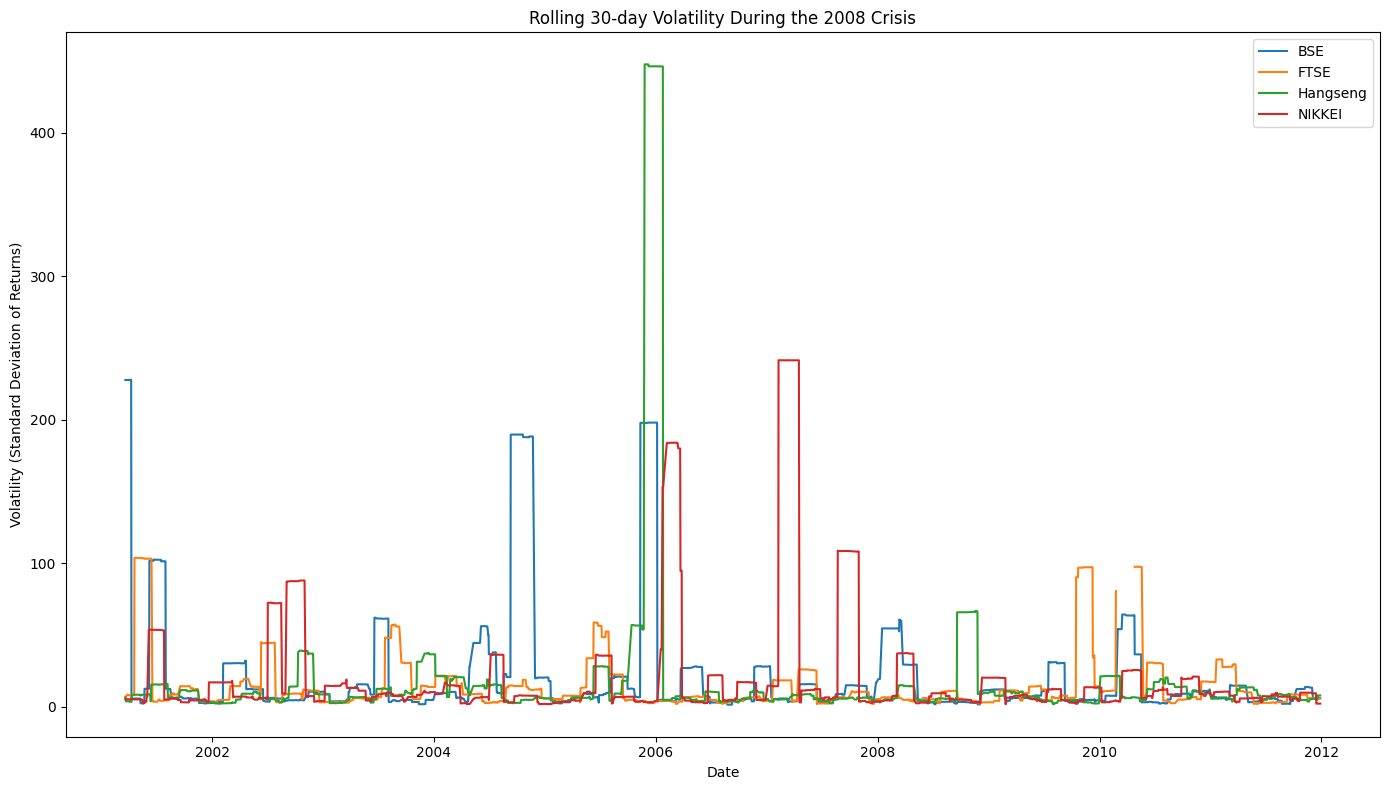

In [14]:
# Calculate rolling standard deviations (30-day window)
rolling_volatility = daily_returns.rolling(window=30).std()

# Plot rolling volatility for selected markets
selected_markets = ["BSE", "FTSE", "Hangseng", "NIKKEI"]  # Adjust based on your interest

plt.figure(figsize=(14, 8))
for market in selected_markets:
    plt.plot(rolling_volatility.index, rolling_volatility[market], label=market)

plt.title("Rolling 30-day Volatility During the 2008 Crisis")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation of Returns)")
plt.legend()
plt.tight_layout()
plt.show()


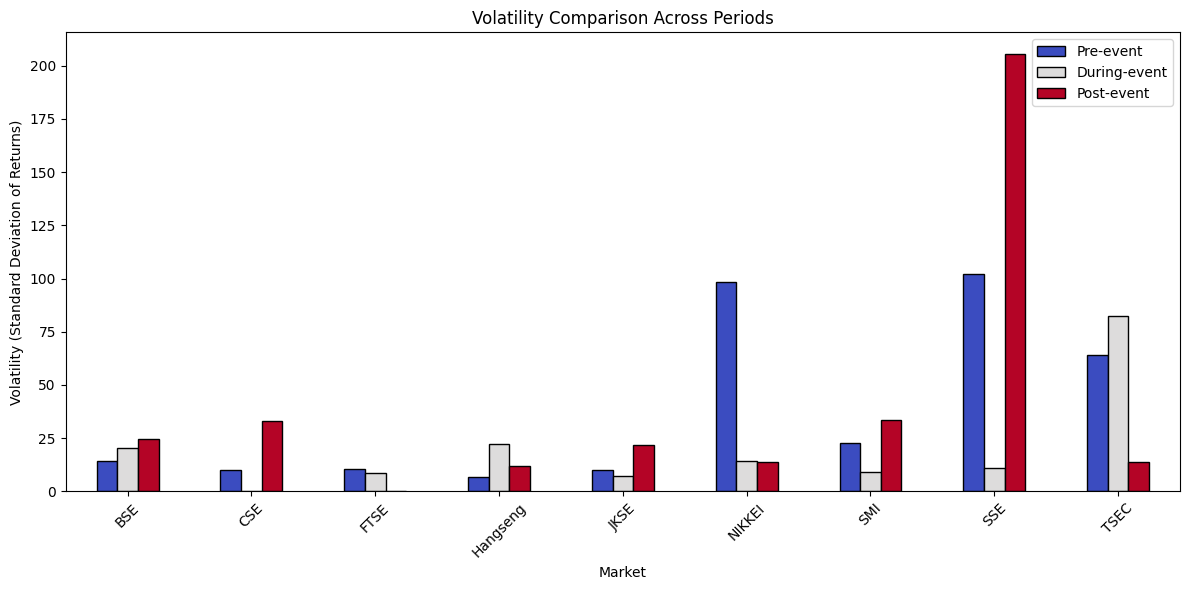

In [15]:
# Bar plot for volatility summary
volatility_summary.T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Volatility Comparison Across Periods")
plt.xlabel("Market")
plt.ylabel("Volatility (Standard Deviation of Returns)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()